# Notebook for testing commands from SSMEstimation Project

### Increase cell width 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Imports 

In [2]:
import importlib
import os
import sys
import warnings
import win32com.client as com

from scipy.stats import truncnorm
from scipy.ndimage.filters import uniform_filter1d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
sys.path.append(
    r'C:\Users\fvall\Documents\Research\TrafficSimulation\SSMEstimation')
import classesForSSM, readers # necessary to reload the module later if 
# needed
import readers
from classesForSSM import DataPostProcessor, SSMEstimator

In [37]:
# Reload after changes
importlib.reload(classesForSSM)
importlib.reload(readers)
from classesForSSM import DataPostProcessor, SSMEstimator
import readers

## Function drafts

In [38]:
reader = readers.VissimDataReader('highway_in_and_out_lanes')

In [39]:
veh_data = reader.load_data()

In [40]:
veh_data.head()

,time,veh_id,veh_type,link,lane,x,vx,y,leader_id,delta_x,vissim_delta_v
0,0.3,1,100,4,1,1.74,121.48,0.5,NaN,250.0,0.0
1,0.4,1,100,4,1,5.11,121.57,0.5,NaN,250.0,0.0
2,0.5,1,100,4,1,8.49,121.66,0.5,NaN,250.0,0.0
3,0.6,1,100,4,1,11.87,121.75,0.5,NaN,250.0,0.0
4,0.7,1,100,4,1,15.26,121.83,0.5,NaN,250.0,0.0


In [42]:
data_processor = DataPostProcessor('vissim', veh_data)

In [43]:
data_processor.post_process_vissim_data()

Computing delta v for 41617 samples
9% done
19% done
29% done
39% done
50% done
59% done
69% done
79% done
89% done
99% done
Out of bounds leaders found in 0 out of 41617 samples (0%)


In [44]:
veh_data.head()

,time,veh_id,veh_type,link,lane,x,vx,y,leader_id,delta_x,vissim_delta_v,delta_v,leader_type
0,79.5,13,100,10003,1,98.79,19.341667,0.5,13,250.00,0.00,0.000000,0.0
1,79.5,15,100,10003,1,70.83,18.638889,0.5,13,27.89,-2.59,-0.702778,100.0
2,79.5,26,100,6,1,7.11,12.211111,0.5,37,25.60,-17.45,-4.783333,100.0
3,79.5,30,100,3,1,509.11,10.375000,0.5,15,76.34,-29.88,-8.263889,100.0
4,79.5,31,100,6,2,109.37,21.575000,0.5,31,250.00,0.00,0.000000,0.0


In [46]:
ssm_estimator = SSMEstimator(veh_data)

In [47]:
ssm_estimator.include_ttc()

In [48]:
veh_data.head()

,time,veh_id,veh_type,link,lane,x,vx,y,leader_id,delta_x,vissim_delta_v,delta_v,leader_type,TTC
0,79.5,13,100,10003,1,98.79,19.341667,0.5,13,250.00,0.00,0.000000,0.0,inf
1,79.5,15,100,10003,1,70.83,18.638889,0.5,13,27.89,-2.59,-0.702778,100.0,inf
2,79.5,26,100,6,1,7.11,12.211111,0.5,37,25.60,-17.45,-4.783333,100.0,inf
3,79.5,30,100,3,1,509.11,10.375000,0.5,15,76.34,-29.88,-8.263889,100.0,inf
4,79.5,31,100,6,2,109.37,21.575000,0.5,31,250.00,0.00,0.000000,0.0,inf


In [51]:
veh_data[veh_data['TTC']<1.5]

,time,veh_id,veh_type,link,lane,x,vx,y,leader_id,delta_x,vissim_delta_v,delta_v,leader_type,TTC
25,79.5,52,100,3,2,371.28,25.211111,0.77,49,14.08,8.52,14.338889,100.0,0.981945
1517,84.4,52,100,3,2,470.57,17.811111,0.87,51,6.36,14.58,4.430556,100.0,1.435486
1545,84.5,52,100,3,2,472.36,17.927778,0.90,51,5.94,15.95,4.811111,100.0,1.234642
1574,84.6,52,100,3,2,474.16,18.047222,0.93,51,5.48,17.33,5.194444,100.0,1.054973
1602,84.7,52,100,3,2,475.97,18.163889,0.97,51,4.98,18.70,5.575000,100.0,0.893274
1630,84.8,52,100,3,3,477.79,18.280556,0.00,51,4.44,20.07,5.955556,100.0,0.745522
14323,164.0,97,100,3,2,475.09,23.088889,0.93,93,19.38,45.76,13.130556,100.0,1.475947
14346,164.1,97,100,3,2,477.41,23.222222,0.97,93,18.09,47.27,13.550000,100.0,1.335055
14369,164.2,97,100,3,3,479.73,23.352778,0.00,93,16.76,48.78,13.969444,100.0,1.199761
15721,170.3,99,100,3,2,494.13,16.363889,0.83,98,17.37,42.03,11.722222,100.0,1.481801


## Open vissim instance

In [ ]:
network_folder = VissimInterface.networks_folder
# network_file = "I710 - MultiSec - 3mi"
network_file = 'highway_in_and_out_lanes'

In [ ]:
# vissimInt = VissimInterface()
# vissimInt.open_and_set_simulation()
# vissim = vissimInt.vissim

## Commands testing 

In [4]:
# data_folder = 'C:\\Users\\fvall\\Documents\\Research\\TrafficSimulation\\post_processed_data\\NGSIM'
# data_file = 'us-101'
data_file = 'highway_in_and_out_lanes'

In [5]:
dr = readers.PostProcessedDataReader(data_file)

In [6]:
data = dr.load_data()

### Checking safe gap computation

In [15]:
accel = 0.5
max_brake = 6.5
tau_d = 1
max_jerk = 50

In [16]:
tau_j = (accel + max_brake)/max_jerk
lambda1 = (accel + max_brake)*(tau_d + tau_j/2)
lambda0 = -(accel + max_brake)/2 * (tau_d**2 + tau_d*tau_j + tau_j**2/3)
print('tau_j = {}\nlambda1 = {}\nlambda0 = {}'.format(tau_j, lambda1, lambda0))

tau_j = 0.14
lambda1 = 7.49
lambda0 = -4.012866666666667


Above results agree with PyCharm code

Now let's check the safe gap for some vehicle.

Chosen vehicle: time = 90.7, veh_id = 14

In [17]:
veh_14 = data.loc[(data['veh_id']==14) & (data['time'] < 90.8)]
vE = veh_14['vx'].iloc[0]
leader_idx = veh_14['leader_id'].iloc[0]
vL = data.loc[(data['veh_id']==leader_idx) & (data['time'] < 90.8), 'vx'].iloc[0]
safe_gap = (vE**2/2/max_brake - vL**2/2/max_brake 
            + lambda1*vE/max_brake + lambda1**2/2/max_brake
            + lambda0)
print(vE)
print(vL)
print(safe_gap)

13.897222222222226
13.091666666666667
17.988790123456802


Let's check the safe gap of the moment with smallest TTC

In [18]:
min_ttc_idx = data['TTC'].argmin()
print('min(TTC) = ', data['TTC'].iloc[min_ttc_idx])
ego = data.iloc[min_ttc_idx]
vE = ego['vx']
time = ego['time']
leader_idx = ego['leader_id']
vL = data.loc[(data['veh_id']==leader_idx) & (data['time']==time ), 'vx'].iloc[0]
safe_gap = (vE**2/2/max_brake - vL**2/2/max_brake 
            + lambda1*vE/max_brake + lambda1**2/2/max_brake
            + lambda0)
print('vE = ', vE)
print('vL = ', vL)
print('safe gap = ', safe_gap)

min(TTC) =  3.8962542565266736
vE =  11.825
vL =  6.9305555555555545
safe gap =  20.989950617283945


Let's check the safe gap of the moment with highest delta v

In [19]:
max_deltaV_idx = data['delta_v'].argmax()
print('max(deltaV) = ', data['delta_v'].iloc[max_deltaV_idx])
ego = data.iloc[max_deltaV_idx]
vE = ego['vx']
time = ego['time']
leader_idx = ego['leader_id']
vL = data.loc[(data['veh_id']==leader_idx) & (data['time']==time ), 'vx'].iloc[0]
safe_gap = (vE**2/2/max_brake - vL**2/2/max_brake 
            + lambda1*vE/max_brake + lambda1**2/2/max_brake
            + lambda0)
print('vE = ', vE)
print('vL = ', vL)
print('safe gap = ', safe_gap)

max(deltaV) =  8.575000000000001
vE =  12.68888888888889
vL =  4.113888888888889
safe gap =  26.007400641025647


In [32]:
veh_23 = data.loc[data['veh_id']==23]
veh_23_sub = veh_23.loc[veh_23['veh_id'] != veh_23['leader_id']]
veh_23_sub.loc[veh_23_sub['time']>=114]

,time,veh_id,veh_type,lane,x,vx,y,leader_id,delta_x,delta_v,TTC,DRAC,CPI,safe_gap,DTSG
5514,114.9,23,100,1,0.68,8.580556,0.95,19,108.60,-6.341667,inf,0.0,0.0,0.0,108.60
5533,115.0,23,100,1,1.55,8.750000,0.92,19,109.24,-6.191667,inf,0.0,0.0,0.0,109.24
5552,115.1,23,100,1,2.43,8.916667,0.89,19,109.87,-6.047222,inf,0.0,0.0,0.0,109.87
5571,115.2,23,100,1,3.33,9.080556,0.86,19,110.48,-5.905556,inf,0.0,0.0,0.0,110.48
5590,115.3,23,100,1,4.25,9.244444,0.83,19,111.08,-5.761111,inf,0.0,0.0,0.0,111.08
5609,115.4,23,100,1,5.18,9.405556,0.80,19,111.66,-5.622222,inf,0.0,0.0,0.0,111.66
5628,115.5,23,100,1,6.13,9.566667,0.78,19,112.23,-5.480556,inf,0.0,0.0,0.0,112.23
5647,115.6,23,100,1,7.09,9.727778,0.75,19,112.79,-5.341667,inf,0.0,0.0,0.0,112.79
5666,115.7,23,100,1,8.07,9.886111,0.72,19,113.33,-5.205556,inf,0.0,0.0,0.0,113.33
5685,115.8,23,100,1,9.07,10.041667,0.69,19,113.86,-5.069444,inf,0.0,0.0,0.0,113.86


In [35]:
has_leader = data['veh_id'] != data['leader_id']
max_DTSG_idx = data['DTSG'].argmin()
print(max_DTSG_idx)
print(has_leader[max_DTSG_idx])

5476
False


### Moving Average Example 

In [8]:
ttc = df[df['TTC']<float('inf')]['TTC']

In [27]:
N = 100000
moving_avg = uniform_filter1d(ttc, size=N, mode='reflect')

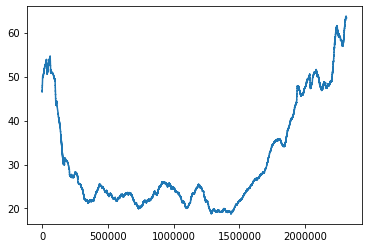

In [28]:
plt.plot(moving_avg)

In [67]:
df.head()

,time,number,veh type,link,lane,x,vx,y,leader number,delta x,delta v,TTC,DRAC,CPI,safe gap,DTSG,time headway gap
0,582.6,11,100,9,3,1565.21,101.09,0.5,11,250.00,0.00,inf,0.0,0.0,0.000000,250.000000,NaN
1,0.0,0,0,0,0,0.00,0.00,0.0,0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,582.6,18,100,9,3,1042.09,98.46,0.5,18,250.00,0.00,inf,0.0,0.0,0.000000,250.000000,NaN
3,582.6,21,100,9,3,559.36,95.60,0.5,21,250.00,0.00,inf,0.0,0.0,0.000000,250.000000,NaN
4,582.6,23,100,9,2,493.85,95.39,0.5,40,42.58,-6.39,inf,0.0,0.0,0.240351,42.339649,29.731564


In [83]:
vissim_df[vissim_df['time']==582.6].head()

,time,number,veh type,link,lane,x,vx,y,leader number,delta x
50848,582.6,11,100,9,3,1565.21,101.09,0.5,NaN,250.00
50849,582.6,17,200,9,2,1371.05,100.52,0.5,29.0,179.70
50850,582.6,18,100,9,3,1042.09,98.46,0.5,NaN,250.00
50851,582.6,21,100,9,3,559.36,95.60,0.5,NaN,250.00
50852,582.6,23,100,9,2,493.85,95.39,0.5,40.0,42.58


In [60]:
print(sum(vissim_df[vissim_df['time']>=582.6]['veh type']==200))
print(sum(df['veh type']==200))

429012
326527


In [42]:
df[df['TTC']<float('inf')][['time', 'TTC']].groupby('time').count()

,TTC
time,
0.0,477482
582.6,69
582.8,69
583.0,71
583.2,69
...,...
3599.2,83
3599.4,84
3599.6,81


### Close Vissim

In [19]:
vissim = None

In [9]:
2169/(60*15+21)*3600

8478.175895765473

In [4]:
(2169-31)*4

8552

In [10]:
31/21*3600

5314.285714285715